In [1]:
%matplotlib inline 

# from imports import *
import torch
from utils import psnr_display

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


C:\ProgramData\Anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


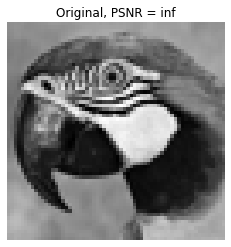

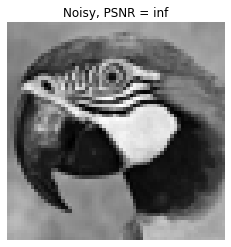

In [2]:
from problems.PR import PhaseRetrieval

problem = PhaseRetrieval(img_path='./data/Set12/07.png', num_meas=1000, H=64, W=64)

psnr_display(img_path='./data/Set12/07.png', output=problem.X, title="Original", H=64, W=64)

psnr_display(img_path='./data/Set12/07.png', output=problem.noisy, title="Noisy", H=64, W=64)

In [3]:
from denoise import NLMDenoiser

denoiser = NLMDenoiser(filter_decay=0.999,
                       filter_size=0.03, patch_size=5, patch_distance=12, multichannel=True)

svrg_out, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(problem=problem,
                                                   denoiser=denoiser,
                                                   eta=.000001, tt=5, T2=1, 
                                                   mini_batch_size=problem.num_meas, verbose=True)

psnr_display(img_path='./data/Set12/07.png', output=svrg_out.reshape(64,64), title="SVRG", H=64, W=64)

AxisError: axis 1 is out of bounds for array of dimension 1